Starting data setup...
Verifying paths...
Google Drive Path exists: True
Data.zip exists: True
Will extract to: /Users/bradrichardson/Desktop/alzheimers-detection/notebooks/data/raw

Extracting dataset...

Counting files...

Dataset Statistics:
--------------------------------------------------
Mild Dementia: 5,002 images
Moderate Dementia: 488 images
Non Demented: 67,222 images
Very mild Dementia: 13,725 images
--------------------------------------------------
Total images: 86,437

Loading sample images...


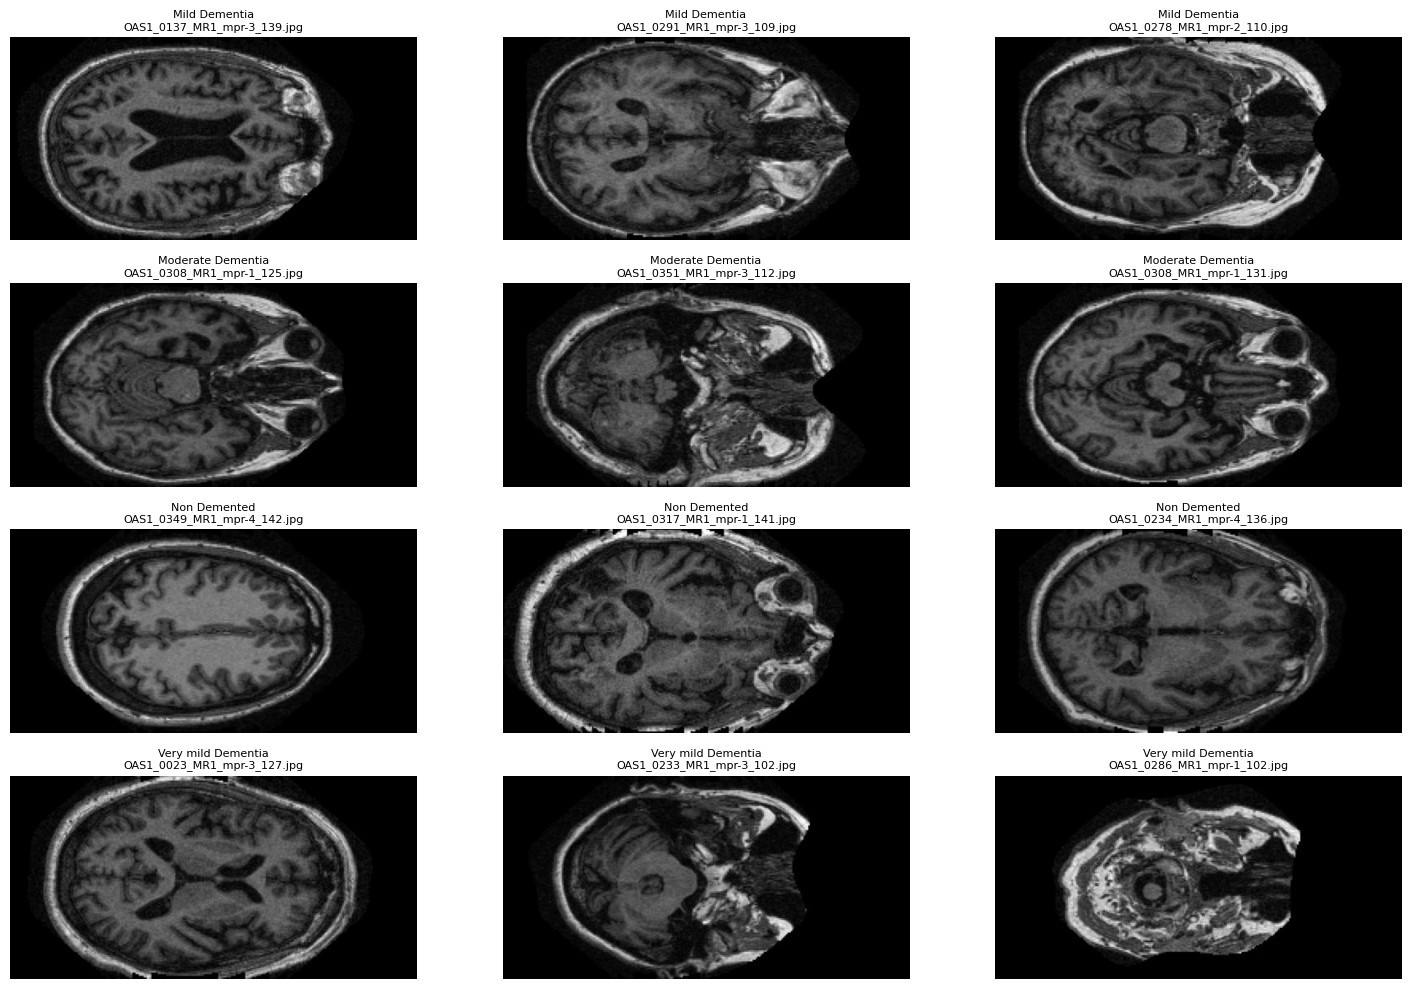


Data setup completed successfully!


In [3]:
# Import necessary libraries
import os
import zipfile
import shutil
from pathlib import Path
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Configure paths using your Mac Google Drive location
GDRIVE_PATH = Path('/Users/bradrichardson/Google Drive/My Drive')
ZIP_PATH = GDRIVE_PATH / "Data.zip"
PROJECT_PATH = Path.cwd()  # Gets current working directory
DATA_PATH = PROJECT_PATH / "data"
EXTRACT_PATH = DATA_PATH / "raw"

def setup_data():
    """Extract data and provide dataset statistics"""
    # Create necessary directories
    DATA_PATH.mkdir(exist_ok=True)
    EXTRACT_PATH.mkdir(exist_ok=True)
    
    print("Verifying paths...")
    print(f"Google Drive Path exists: {GDRIVE_PATH.exists()}")
    print(f"Data.zip exists: {ZIP_PATH.exists()}")
    print(f"Will extract to: {EXTRACT_PATH}")
    
    if not ZIP_PATH.exists():
        raise FileNotFoundError(f"Data.zip not found at {ZIP_PATH}")
    
    # Check if data is already extracted
    if (EXTRACT_PATH / "Data").exists():
        print("\nData already extracted!")
    else:
        print("\nExtracting dataset...")
        with zipfile.ZipFile(ZIP_PATH, 'r') as zip_ref:
            zip_ref.extractall(EXTRACT_PATH)
    
    # Get dataset statistics
    data_dir = EXTRACT_PATH / "Data"
    class_counts = {}
    total_images = 0
    
    print("\nCounting files...")
    for class_name in os.listdir(data_dir):
        class_path = data_dir / class_name
        if class_path.is_dir():
            num_images = len(list(class_path.glob('*.jpg')))
            class_counts[class_name] = num_images
            total_images += num_images
    
    # Print dataset statistics
    print("\nDataset Statistics:")
    print("-" * 50)
    for class_name, count in sorted(class_counts.items()):
        print(f"{class_name}: {count:,} images")
    print("-" * 50)
    print(f"Total images: {total_images:,}")
    
    return data_dir

def load_sample_images(data_dir, samples_per_class=3):
    """Load and display sample images from each class"""
    plt.figure(figsize=(15, 10))
    plot_idx = 1
    
    for class_name in sorted(os.listdir(data_dir)):
        class_path = data_dir / class_name
        if class_path.is_dir():
            image_files = list(class_path.glob('*.jpg'))[:samples_per_class]
            
            for img_path in image_files:
                plt.subplot(4, samples_per_class, plot_idx)
                img = Image.open(img_path)
                plt.imshow(img, cmap='gray')
                plt.title(f'{class_name}\n{img_path.name}', fontsize=8)
                plt.axis('off')
                plot_idx += 1
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    try:
        print("Starting data setup...")
        data_dir = setup_data()
        
        print("\nLoading sample images...")
        load_sample_images(data_dir)
        
        print("\nData setup completed successfully!")
        
    except Exception as e:
        print(f"\nError during setup: {str(e)}")